# Imports


In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [115]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [116]:
print(x_train.shape, y_train.shape) # 60000 images and labels
print(x_test.shape, y_test.shape) # 10,000 test images and labels

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualise Examples

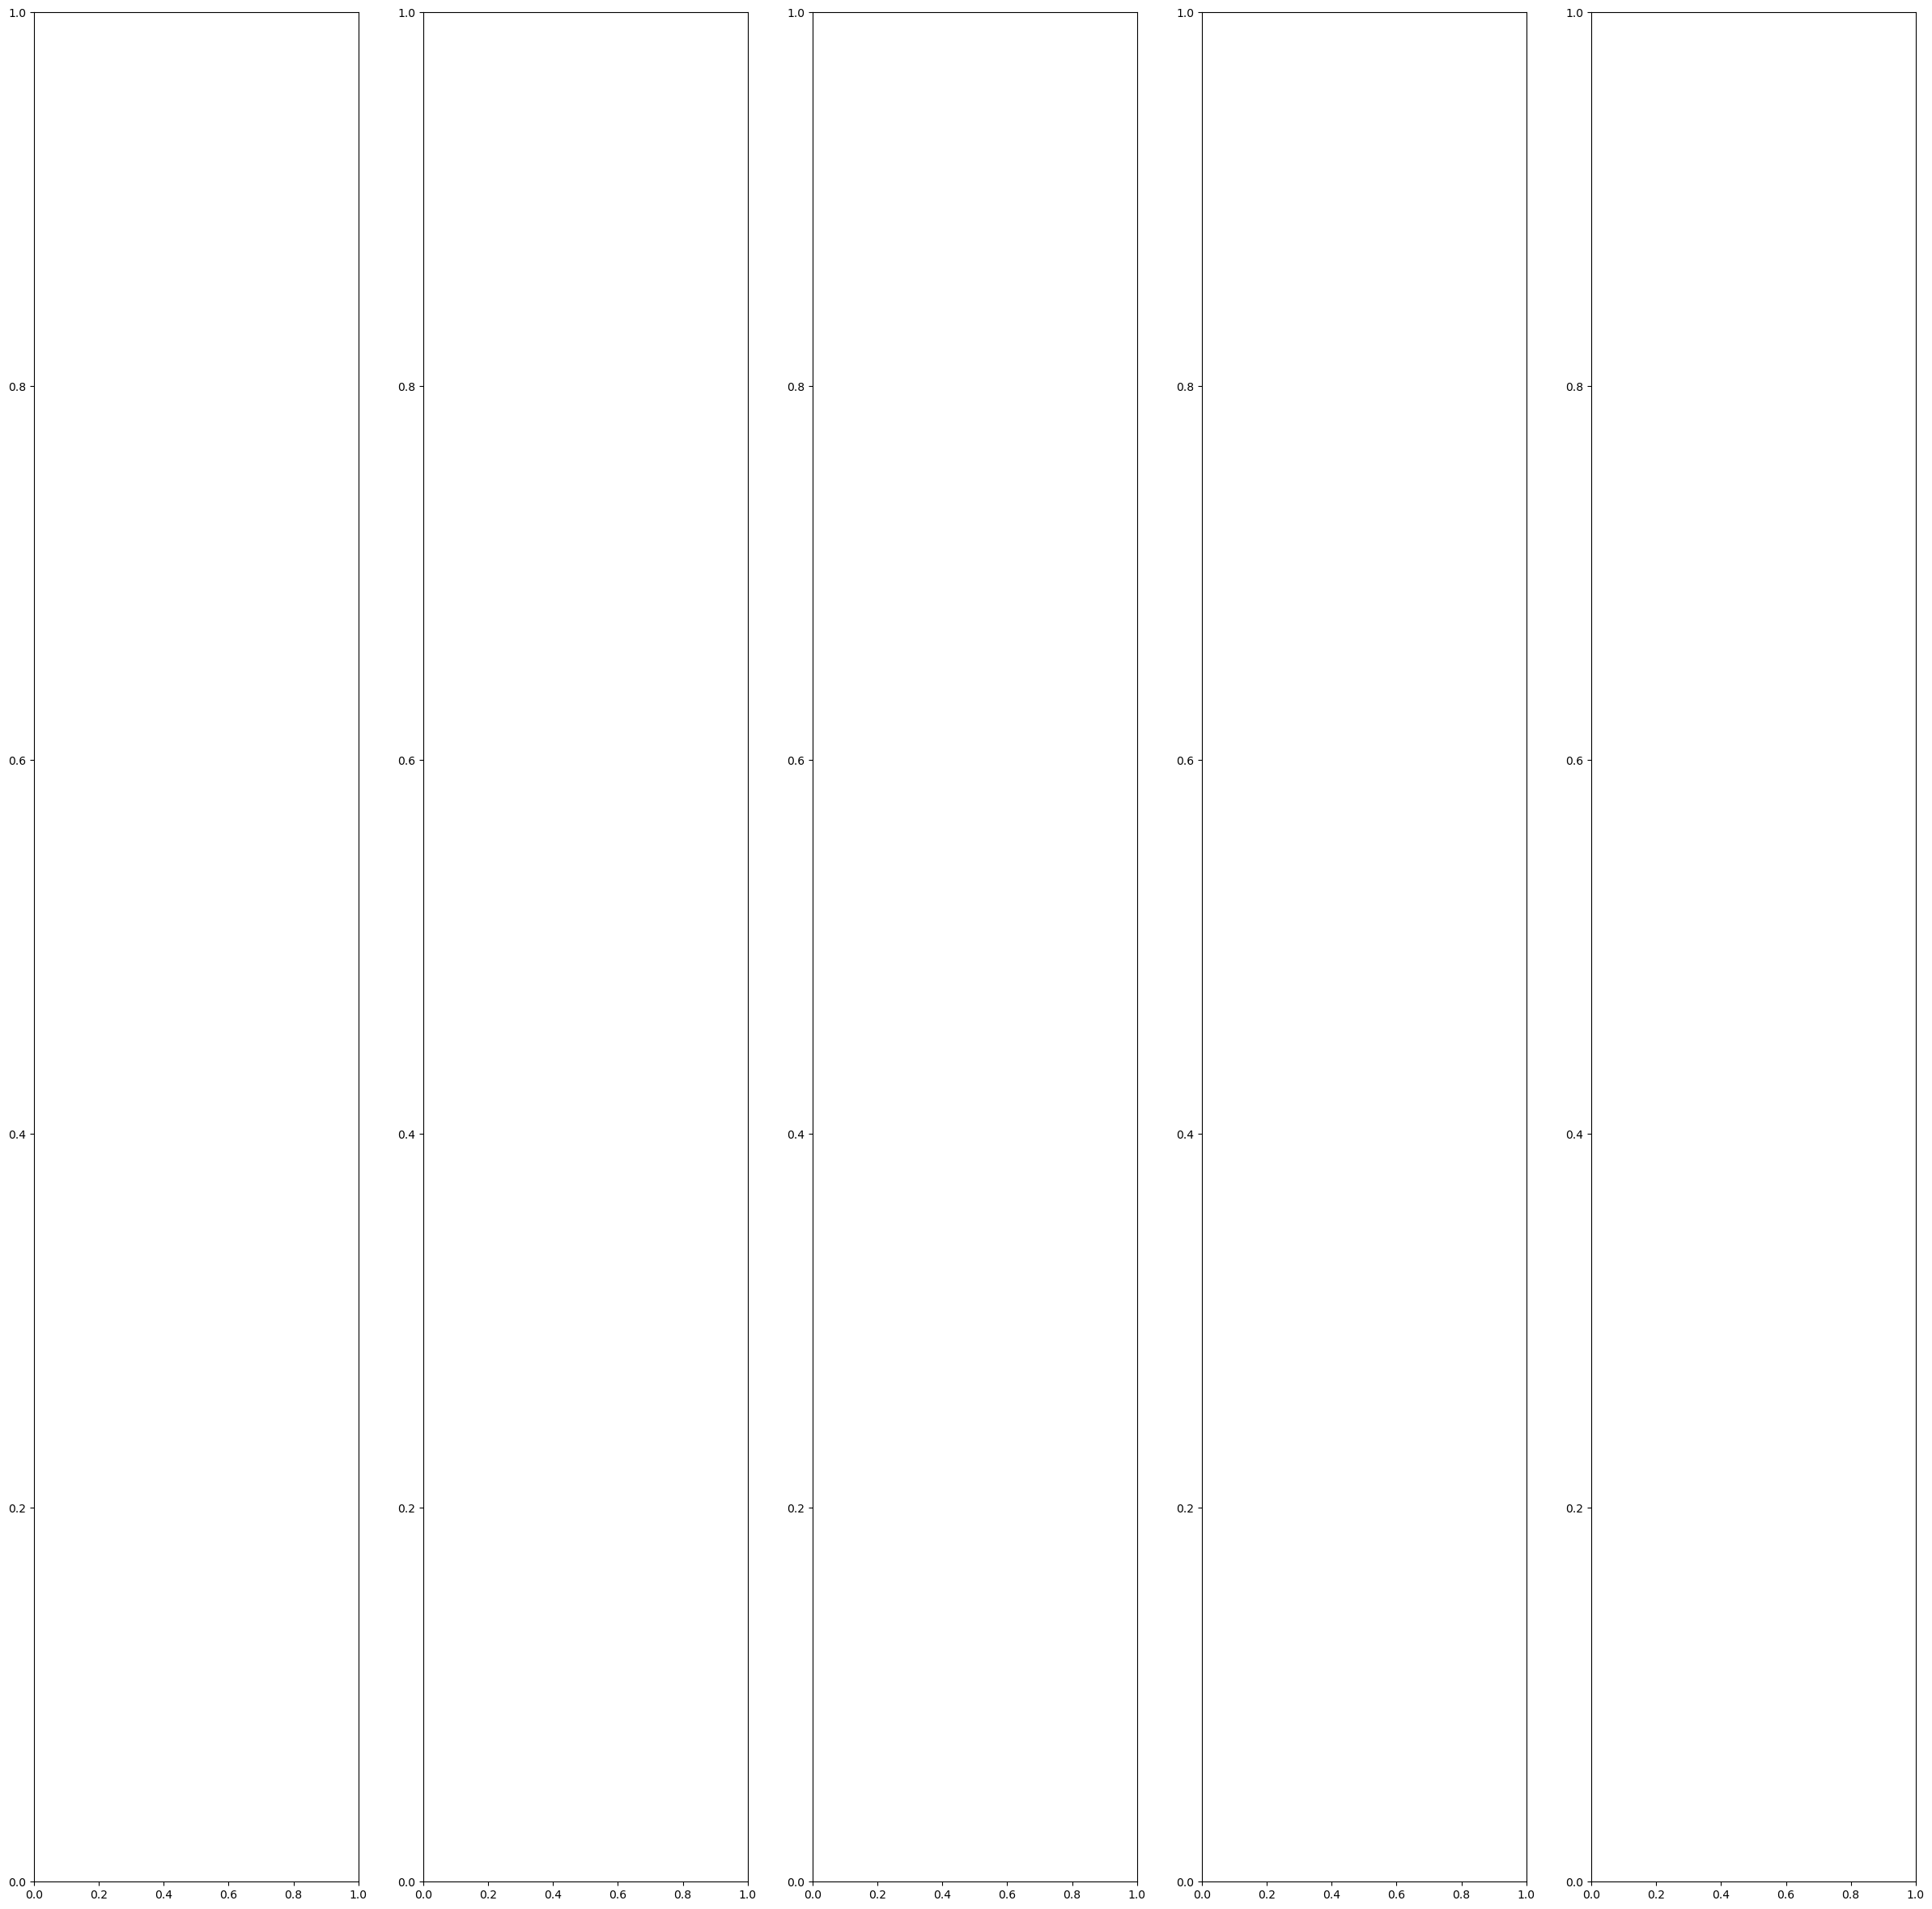

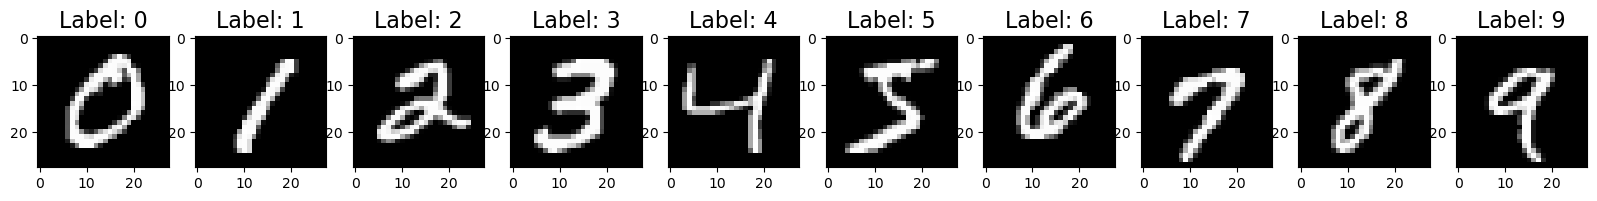

In [117]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)
    
# data set is pretty much balanced so no class balancing required

plt.show()

# One hot encoding

one hot encoding as we don't want values inbetween discrete classes e.g. 4.5 we want either 4 or 5

In [118]:
print([y_train[i] for i in range(10)])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
    print(y_train[i])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

Normalise data (better performance, ensures features contribute equally)

In [119]:
# normalise data
x_train = x_train/255
x_test = x_test/255

In [120]:
# reshape data (flatten before we feed into neural net)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Model

In [121]:
# Create model (fully connected neural network (basic mnist))

# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25)) # 25% of neurons drop out during training with prevents overfitting

model.add(Dense(units=10, activation='softmax')) # softmax basically just outputs a probability

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

c:\Users\leoja\miniconda3\envs\mnist\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training stage

In [122]:
batch_size = 512
epochs=10 # an epoch is the number of times a training dataset passes through an algorithm
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7003 - loss: 1.0148
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9312 - loss: 0.2386
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9467 - loss: 0.1745
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9607 - loss: 0.1337
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9677 - loss: 0.1122
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9710 - loss: 0.0950
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.0807
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9781 - loss: 0.0720
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.0643
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9838 - loss: 0.0536


# Evaluate on test set

In [123]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9758 - loss: 0.0791
Test Loss: 0.07049685716629028, Test Accuracy: 0.9781000018119812


In [124]:
y_pred = model.predict(x_test) # for each element gives probability of class 
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
[[8.30824865e-06 3.41512191e-07 6.52237286e-05 ... 9.99647737e-01
  6.46107765e-07 4.05508254e-05]
 [2.01195349e-09 1.87581842e-04 9.99800384e-01 ... 4.29800195e-10
  1.92870607e-06 2.97148547e-12]
 [1.27061858e-05 9.98319805e-01 1.03233840e-04 ... 7.34238303e-04
  3.26141453e-04 2.94820329e-05]
 ...
 [1.04658816e-10 1.84201738e-08 4.42030614e-11 ... 1.56918043e-06
  8.85111092e-07 1.59701303e-05]
 [8.69656390e-07 1.46355008e-08 3.83590537e-09 ... 1.84526641e-07
  6.11490686e-05 2.49841108e-08]
 [6.39140580e-08 1.85726745e-09 9.51521386e-08 ... 1.83223380e-12
  2.03900008e-09 7.89536353e-11]]
[7 2 1 ... 4 5 6]


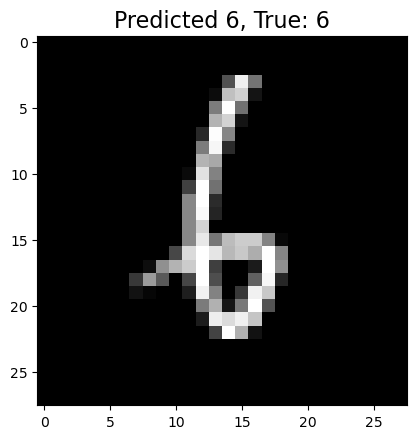

In [125]:
# random image test
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)

y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title(f"Predicted {y_sample_pred_class}, True: {y_sample_true}", fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')
plt.show()

# Confusion Matrix
Shows how accurate model is for each class

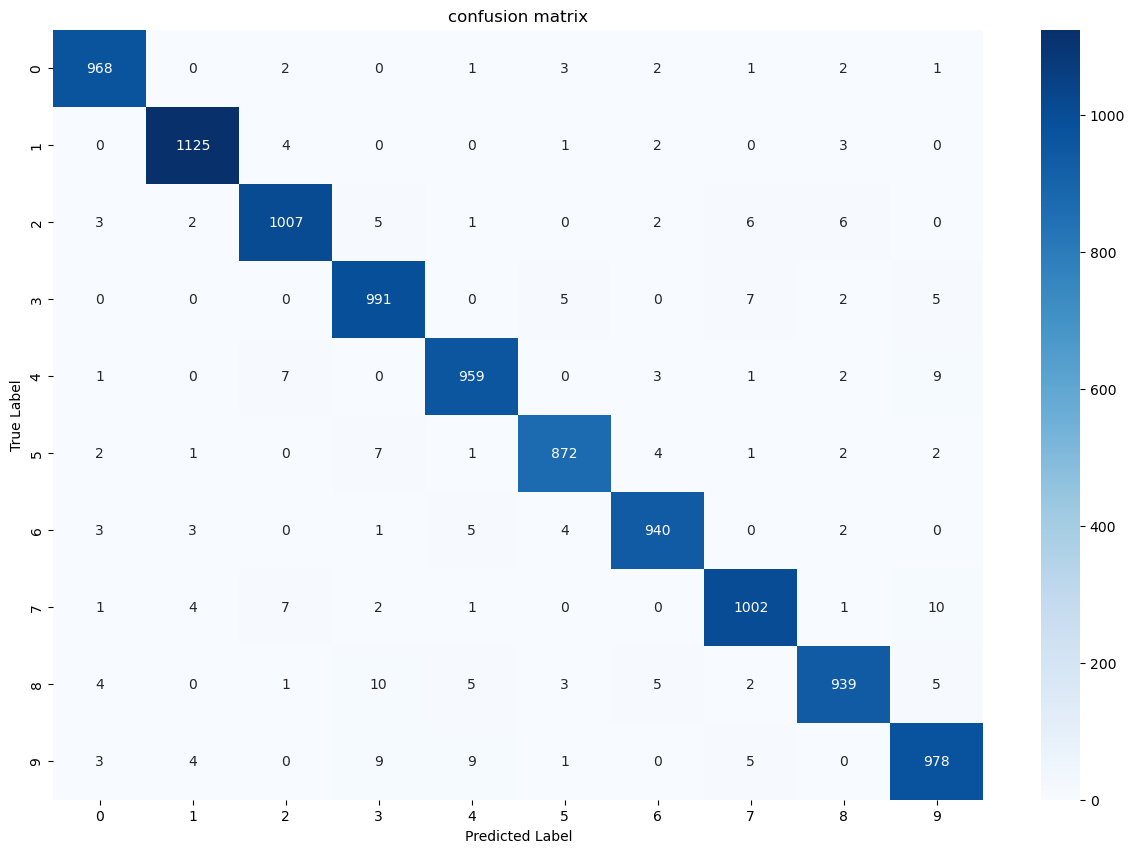

In [126]:
confusion = confusion_matrix(y_true, y_pred_classes)

# plot it

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title("confusion matrix")
plt.show()

# Investigating Errors

In [127]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

# Classes with greatest errors

In [128]:
print(y_pred_errors[0]) # probability per class
print(y_true_errors[0]) # true lables

print(y_pred_errors.shape)
print(y_true_errors.shape)

print(np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))[:6]) # finds y_true_errors as index for every row in y_pred_errors, hence we take diagonal


[2.7358592e-05 3.6597686e-04 5.0489801e-01 9.9576915e-05 6.3172886e-03
 7.4256369e-04 4.8748049e-01 1.4077156e-05 5.4623677e-05 3.4140054e-08]
4
(219, 10)
(219,)
[0.00631729 0.02273753 0.26393497 0.19925319 0.1031801  0.01446982]


In [129]:
y_pred_errors_prob = np.max(y_pred_errors, axis=1)
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1)) # y_pred errors, we take the probability at y_true_errors
diff_errors_pred_true = y_pred_errors_prob - true_prob_errors

# list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
#last five
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

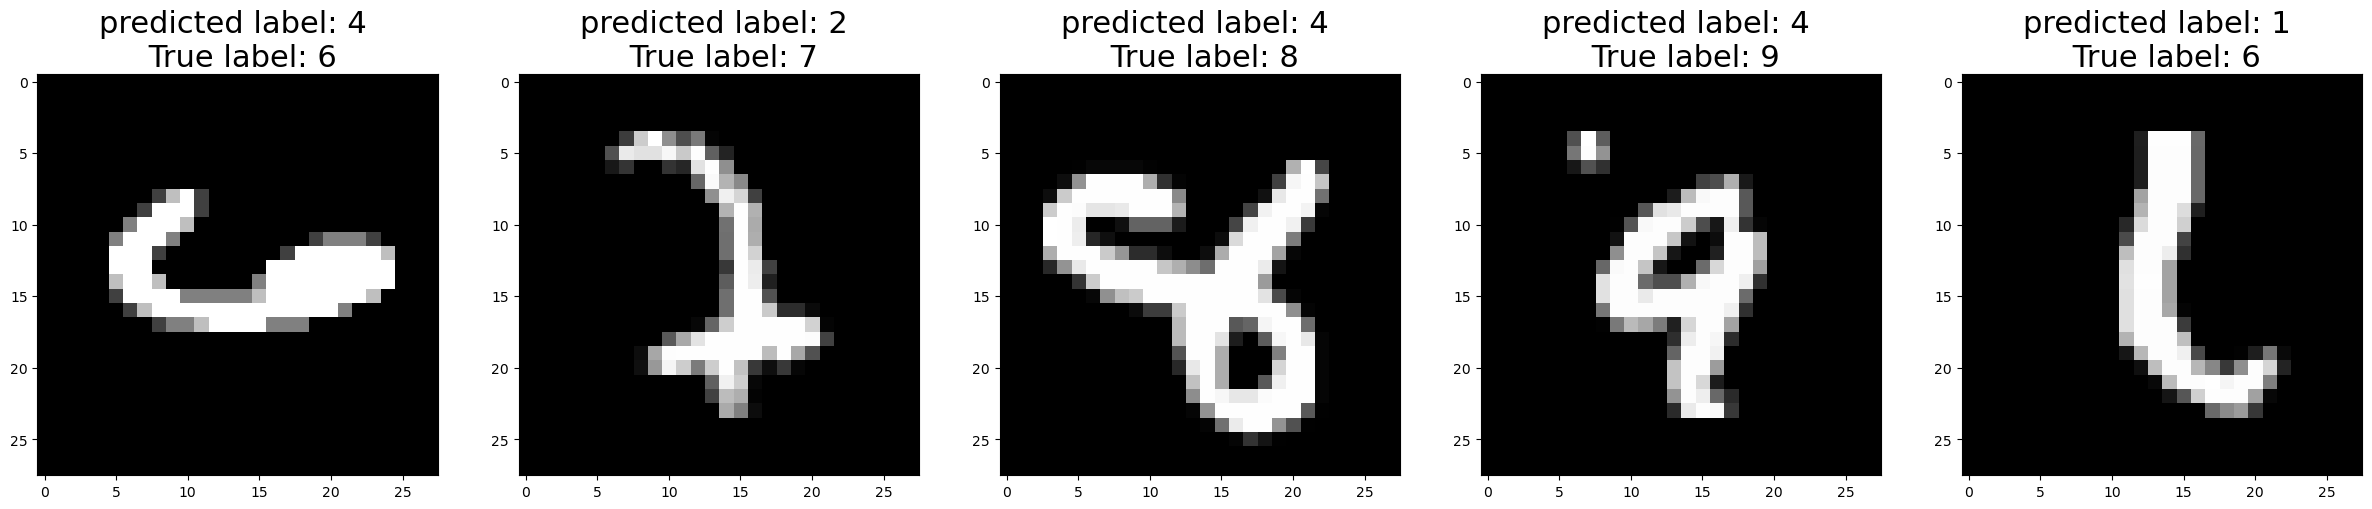

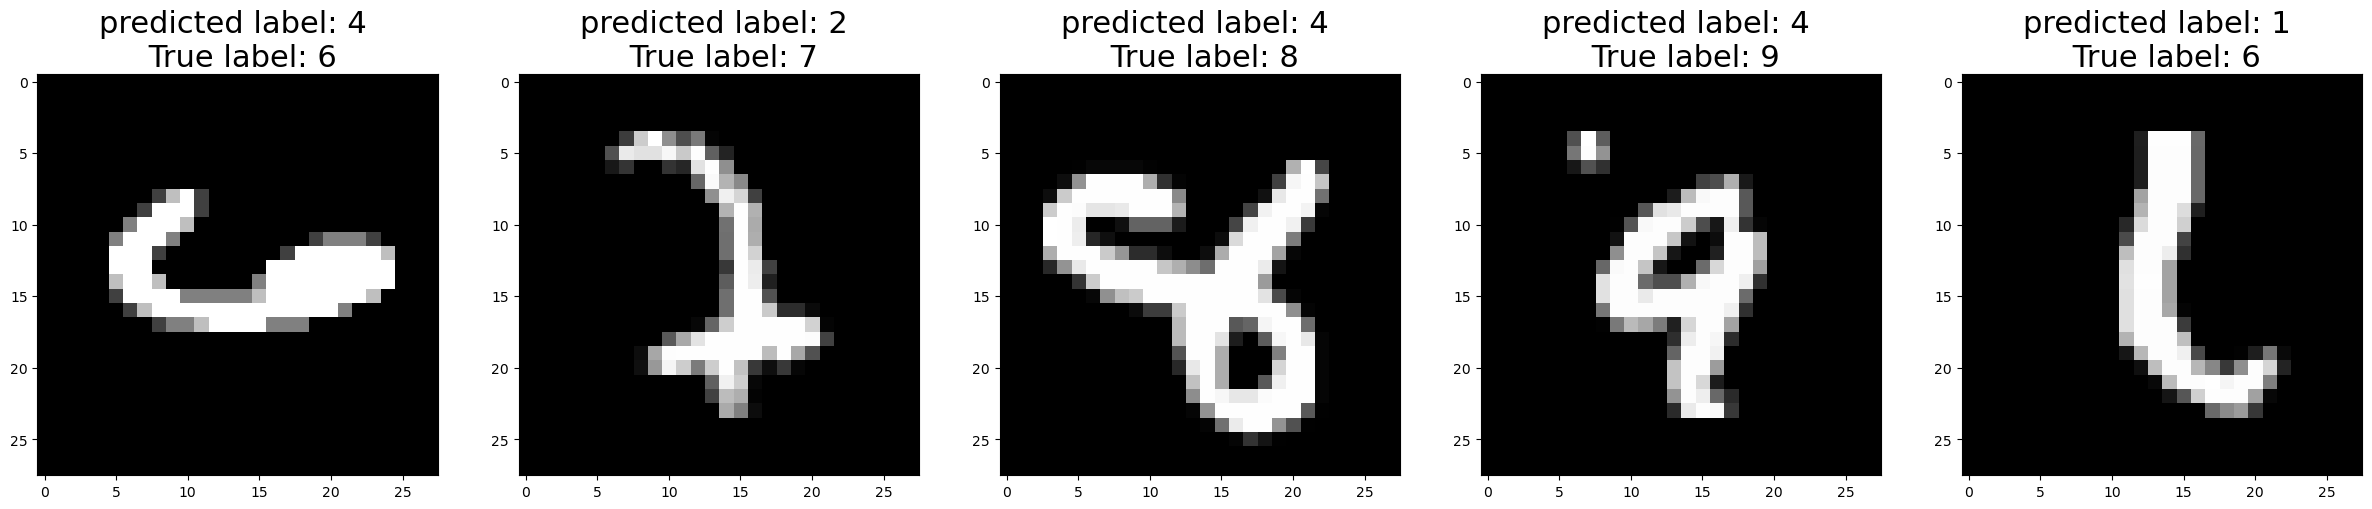

In [131]:
num = len(top_idx_diff_errors)
f,ax = plt.subplots(1,num,figsize=(30,30))

for i in range(0, num):
    idx=top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28,28)
    y_t  = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f"predicted label: {y_p} \n True label: {y_t}", fontsize=22)

plt.show()